In [7]:
# Solution to Exercise 6, Introduction to Classical and Quantum Computing T.G Wong
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *

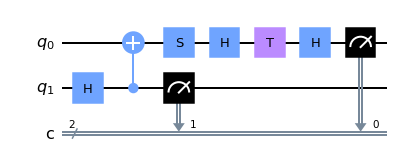

In [8]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)
circuit.h(q[1])
circuit.cx(q[1], q[0])
circuit.s(q[0])
circuit.h(q[0])
circuit.t(q[0])
circuit.h(q[0])
circuit.measure([0,1],[0,1])
circuit.draw()

In [9]:
Aer.backends() # display simulators

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Job Status: job has successfully run
{'01': 92, '11': 440, '10': 63, '00': 429}


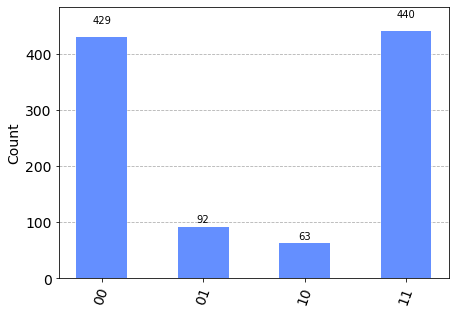

In [10]:
# Run circuit on simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
job_monitor(job)
count = job.result().get_counts()
print(count)
plot_histogram(count)

In [12]:
# Display real IBM quantum computers
provider = IBMQ.load_account()
provider.backends(min_num_qubits=5)

ibmqfactory.load_account:WARNING:2023-03-02 03:58:47,087: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

Job Status: job has successfully run
{'00': 1732, '01': 512, '10': 373, '11': 1383}


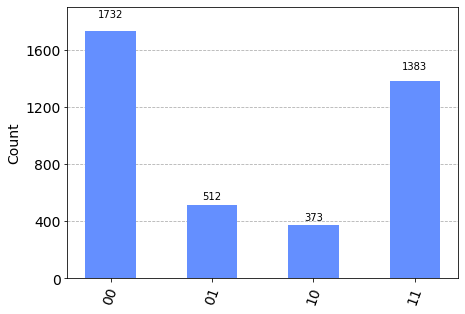

In [15]:
# Results on real quantum computer: ibmq_lima
backend = provider.get_backend('ibmq_lima')
job = execute(circuit, backend)
job_monitor(job)
count = job.result().get_counts()
print(count)
plot_histogram(count)